# Step 1: Loading Data and Displaying as DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load IMDB dataset
data = pd.read_csv("C:/Users/Rajeswari Sohith/Documents/MLDM/Task 3/IMDB_dataset_320.000_reviews.csv", nrows=10000)

# Display data as a dataframe
print("DataFrame Information:")
print(data.info())

# EDA - Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id number                   10000 non-null  int64  
 1   Greek title                 10000 non-null  object 
 2   original title              10000 non-null  object 
 3   category                    10000 non-null  object 
 4   director/creator            10000 non-null  object 
 5   movie lenght                9981 non-null   object 
 6   movie date                  10000 non-null  object 
 7   author                      10000 non-null  object 
 8   review date                 10000 non-null  object 
 9   review title                10000 non-null  object 
 10  review                      10000 non-null  object 
 11  label                       10000 non-null  int64  
 12  mean of stars               10000 non-null  float64
 13  number of

# Exploratory Data Analysis (EDA)

In [2]:
null_values = data.isnull().sum()
print("Null Values in the Dataset:")
print(null_values)

Null Values in the Dataset:
id number                      0
Greek title                    0
original title                 0
category                       0
director/creator               0
movie lenght                  19
movie date                     0
author                         0
review date                    0
review title                   0
review                         0
label                          0
mean of stars                  0
number of reviews              0
full reviews average stars     0
url                            0
dtype: int64


In [3]:
# Rename the 'movie lenght' column to 'movie length'
data.rename(columns={'movie lenght': 'movie length'}, inplace=True)
# Fill missing values for 'movie length' column with 'Unknown'
data['movie length'].fillna('Unknown', inplace=True)

# Check if there are any remaining null values
remaining_null_values = data.isnull().sum()
print("Remaining Null Values in the Dataset:")
print(remaining_null_values)

Remaining Null Values in the Dataset:
id number                     0
Greek title                   0
original title                0
category                      0
director/creator              0
movie length                  0
movie date                    0
author                        0
review date                   0
review title                  0
review                        0
label                         0
mean of stars                 0
number of reviews             0
full reviews average stars    0
url                           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id number                   10000 non-null  int64  
 1   Greek title                 10000 non-null  object 
 2   original title              10000 non-null  object 
 3   category                    10000 non-null  object 
 4   director/creator            10000 non-null  object 
 5   movie length                10000 non-null  object 
 6   movie date                  10000 non-null  object 
 7   author                      10000 non-null  object 
 8   review date                 10000 non-null  object 
 9   review title                10000 non-null  object 
 10  review                      10000 non-null  object 
 11  label                       10000 non-null  int64  
 12  mean of stars               10000 non-null  float64
 13  number of reviews           1000

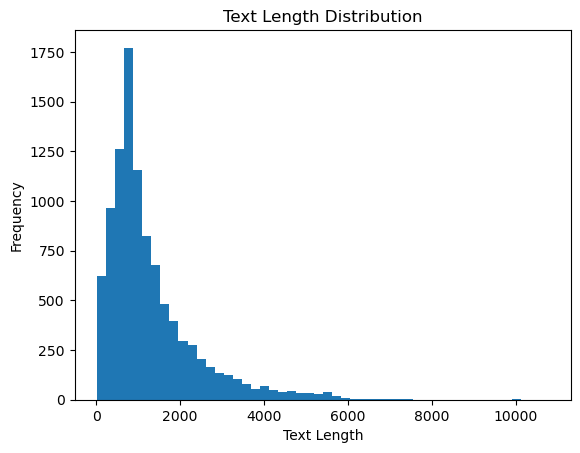

In [4]:
# Basic statistics and information about the dataset
print(data.info())
print(data.describe())

# Visualizations for EDA (e.g., histogram of text lengths)
data['text_length'] = data['review'].apply(len)
data['text_length'].plot.hist(bins=50)
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


# Data Preprocessing for Text Analysis

In [5]:
# Text preprocessing steps (cleaning, lowercasing, removing punctuation)
data['clean_review'] = data['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['clean_review'] = data['clean_review'].str.replace('[^\w\s]', '', regex=True)  # Remove punctuation
# Additional preprocessing steps like stopwords removal, stemming, or lemmatization can be applied here

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

# Download NLTK resources (if not downloaded)
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Define stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Function for text preprocessing including stopwords removal, stemming, and lemmatization
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    
    # Removing punctuation and stopwords
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Stemming and Lemmatization
    stemmed_tokens = [porter.stem(word) for word in tokens]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return stemmed_tokens, lemmatized_tokens

# Apply preprocessing to the 'clean_review' column
data['stemmed_tokens'], data['lemmatized_tokens'] = zip(*data['clean_review'].apply(preprocess_text))

# Show the preprocessed data
print(data[['stemmed_tokens', 'lemmatized_tokens']].head())


[nltk_data] Downloading package omw-1.4 to C:\Users\Rajeswari
[nltk_data]     Sohith\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rajeswari
[nltk_data]     Sohith\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rajeswari
[nltk_data]     Sohith\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Rajeswari
[nltk_data]     Sohith\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                      stemmed_tokens  \
0  [yaara, sili, sili, virah, ki, raat, ka, jalna...   
1  [gulzar, best, tell, intriigu, stori, eas, per...   
2  [complet, mesmer, lekin, especi, castl, dimpl,...   
3  [greatli, enjoy, develop, stori, line, music, ...   
4  [line, time, blurri, past, present, futur, mer...   

                                   lemmatized_tokens  
0  [yaara, sili, sili, virah, ki, raat, ka, jalna...  
1  [gulzar, best, telling, intriiguing, story, ea...  
2  [completely, mesmerized, lekin, especially, ca...  
3  [greatly, enjoyed, development, story, line, m...  
4  [line, time, blurry, past, present, future, me...  


In [6]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


# Sentiment Analysis

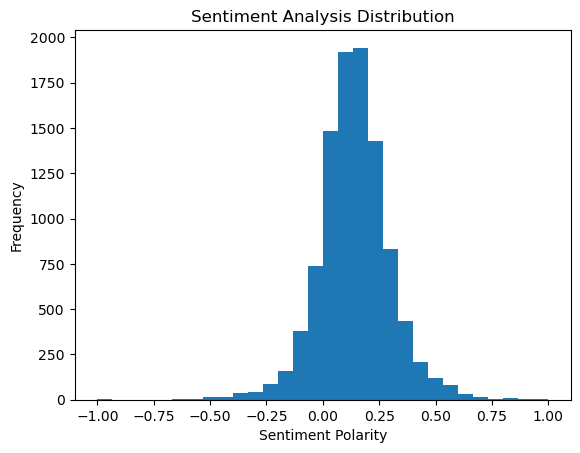

In [7]:
from textblob import TextBlob

# Sentiment Analysis using TextBlob
data['sentiment'] = data['clean_review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Visualizing Sentiment
import matplotlib.pyplot as plt

plt.hist(data['sentiment'], bins=30)
plt.title('Sentiment Analysis Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

# Analyze results and draw conclusions on sentiment polarity
# Compare positive, negative, and neutral sentiments or any other relevant analysis


In [8]:
# Count and percentage of sentiments
positive_reviews = data[data['sentiment'] > 0.2]
negative_reviews = data[data['sentiment'] < -0.2]
neutral_reviews = data[(data['sentiment'] >= -0.2) & (data['sentiment'] <= 0.2)]

positive_count = len(positive_reviews)
negative_count = len(negative_reviews)
neutral_count = len(neutral_reviews)
total_reviews = len(data)

positive_percentage = (positive_count / total_reviews) * 100
negative_percentage = (negative_count / total_reviews) * 100
neutral_percentage = (neutral_count / total_reviews) * 100

print("Positive Reviews: {} ({:.2f}%)".format(positive_count, positive_percentage))
print("Negative Reviews: {} ({:.2f}%)".format(negative_count, negative_percentage))
print("Neutral Reviews: {} ({:.2f}%)".format(neutral_count, neutral_percentage))



Positive Reviews: 3160 (31.60%)
Negative Reviews: 194 (1.94%)
Neutral Reviews: 6646 (66.46%)


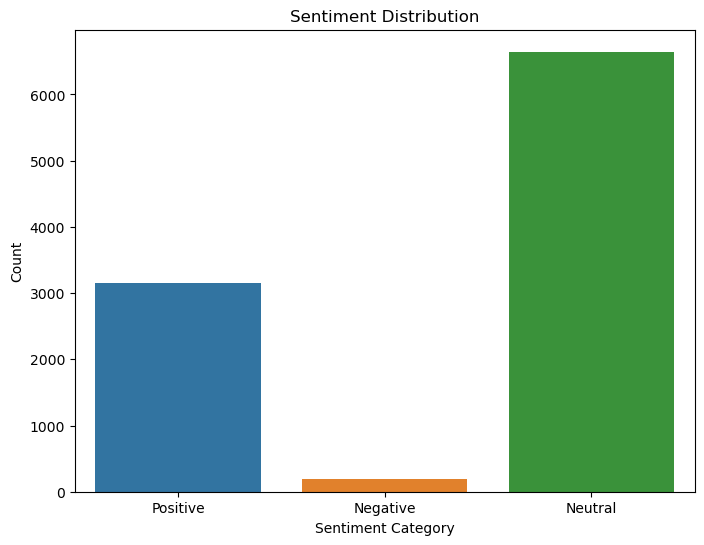

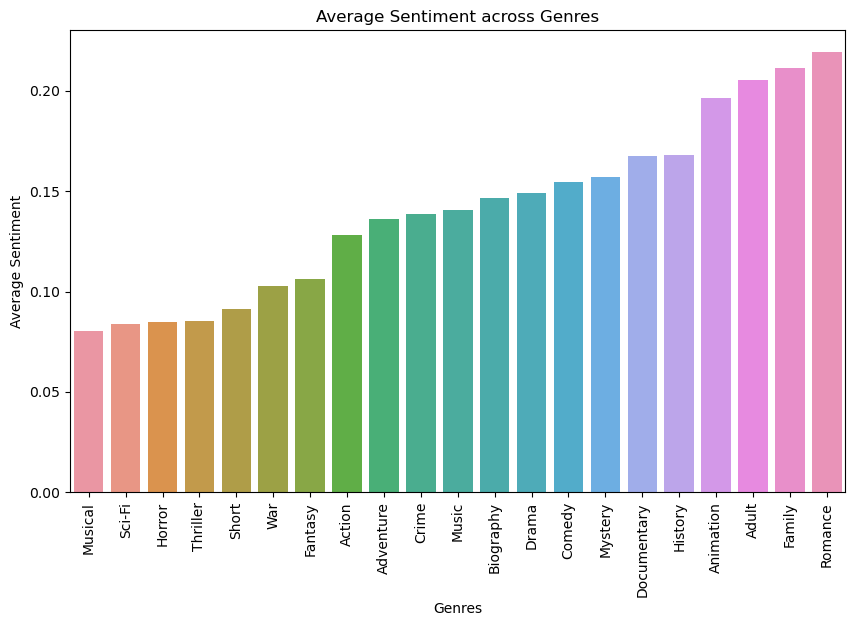

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for sentiment distribution
sentiment_counts = [positive_count, negative_count, neutral_count]
sentiment_labels = ['Positive', 'Negative', 'Neutral']

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_labels, y=sentiment_counts)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Sentiment analysis across genres (if available)
# Assuming 'genre' column is available in the dataset
genre_sentiment = data.groupby('category')['sentiment'].mean().sort_values()
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_sentiment.index, y=genre_sentiment.values)
plt.title('Average Sentiment across Genres')
plt.xlabel('Genres')
plt.ylabel('Average Sentiment')
plt.xticks(rotation=90)
plt.show()
